In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [417]:
df = pd.read_csv('earthquake_data.csv')

In [418]:
df.head(20)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,green,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,green,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama
8,"M 6.8 - 55 km SSW of Aguililla, Mexico",6.8,22-09-2022 06:16,8,7,yellow,1,1179,us,175,2.137,92.0,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.6,19-09-2022 18:05,9,8,yellow,1,1799,us,271,1.153,69.0,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico


In [605]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [419]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [420]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [422]:
df['date_time'].unique()

array(['22-11-2022 02:03', '18-11-2022 13:37', '12-11-2022 07:09',
       '11-11-2022 10:48', '09-11-2022 10:14', '09-11-2022 09:51',
       '09-11-2022 09:38', '20-10-2022 11:57', '22-09-2022 06:16',
       '19-09-2022 18:05', '18-09-2022 06:44', '17-09-2022 13:41',
       '14-09-2022 11:04', '10-09-2022 23:47', '05-09-2022 04:52',
       '14-08-2022 13:44', '27-07-2022 00:43', '08-06-2022 00:55',
       '26-05-2022 12:02', '19-05-2022 10:13', '10-05-2022 23:06',
       '21-04-2022 07:42', '31-03-2022 05:44', '30-03-2022 20:56',
       '22-03-2022 17:41', '16-03-2022 14:36', '13-03-2022 21:09',
       '02-03-2022 12:52', '16-02-2022 20:21', '03-02-2022 15:58',
       '29-01-2022 02:46', '14-01-2022 09:05', '11-01-2022 12:39',
       '11-01-2022 11:35', '11-01-2022 01:07', '07-01-2022 17:45',
       '29-12-2021 18:25', '14-12-2021 03:20', '28-11-2021 10:52',
       '10-11-2021 15:45', '11-10-2021 09:10', '09-10-2021 10:58',
       '02-10-2021 06:29', '22-09-2021 09:57', '08-09-2021 01:

In [423]:
df['continent'].unique()

array(['Oceania', nan, 'North America', 'Asia', 'South America', 'Europe',
       'Africa'], dtype=object)

In [424]:
df['continent'].fillna(value='Antarctica', inplace=True)

In [425]:
df['continent'].value_counts()

Antarctica       576
Asia             100
South America     55
North America     34
Europe            10
Oceania            4
Africa             3
Name: continent, dtype: int64

In [426]:
df['alert'].unique()

array(['green', 'yellow', 'orange', 'red', nan], dtype=object)

In [427]:
df['alert'].fillna(value='green', inplace=True)

In [428]:
df['alert'].unique()

array(['green', 'yellow', 'orange', 'red'], dtype=object)

In [429]:
df['country'].fillna(value='Norway', inplace=True)

In [430]:
df['country'].value_counts()

Norway                                                        298
Indonesia                                                     110
Papua New Guinea                                               56
Chile                                                          34
Vanuatu                                                        27
Solomon Islands                                                22
Japan                                                          21
Peru                                                           20
Mexico                                                         20
Philippines                                                    17
United States of America                                       17
Russia                                                         15
People's Republic of China                                     12
New Zealand                                                     9
Fiji                                                            9
Taiwan    

In [431]:
df['location'].fillna(value="the Fiji Islands", inplace=True)

In [432]:
df['location'].value_counts()

Kirakira, Solomon Islands    17
Kokopo, Papua New Guinea     16
Sola, Vanuatu                15
Panguna, Papua New Guinea    13
Tadine, New Caledonia        11
                             ..
Nago, Japan                   1
Sabang, Indonesia             1
Jiquilillo, Nicaragua         1
Tarauaca, Brazil              1
Hojancha, Costa Rica          1
Name: location, Length: 413, dtype: int64

# Exploratory Data Analysis

# Univariate Analysis

Text(0.5, 1.0, 'MMI')

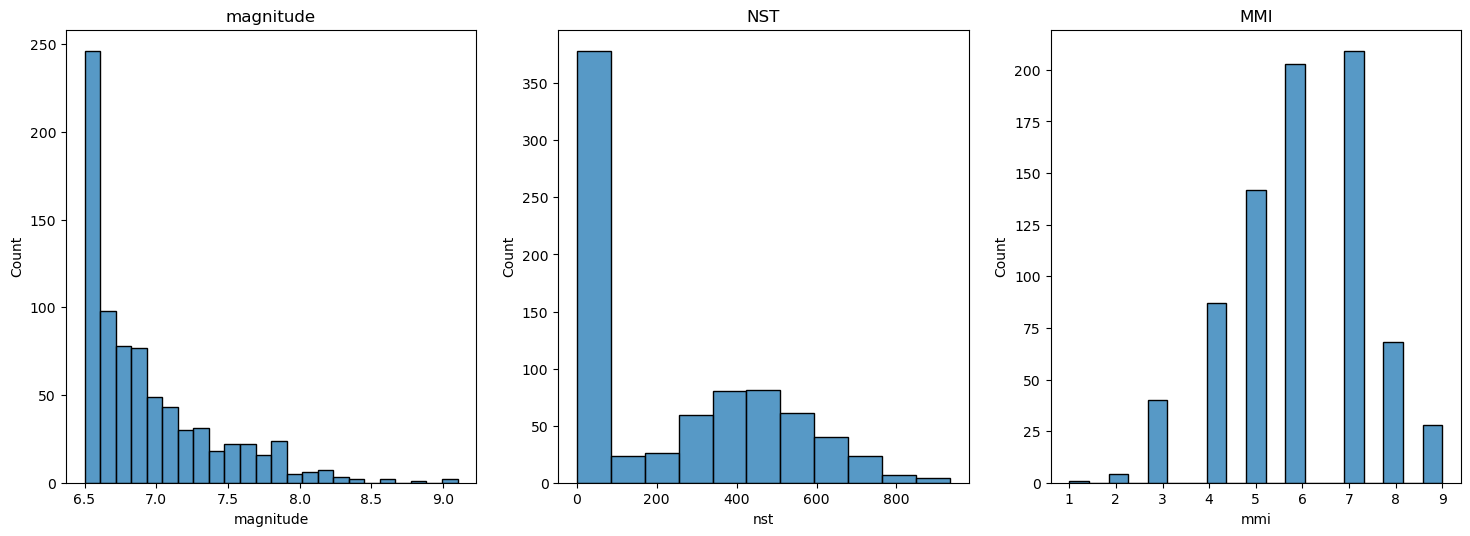

In [434]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6), dpi =100)
sns.histplot(data=df, x ='magnitude', ax=axes[0])
axes[0].set_title('magnitude')

sns.histplot(data=df, x='nst', ax=axes[1])
axes[1].set_title('NST')

sns.histplot(data=df, x = 'mmi', ax=axes[2])
axes[2].set_title('MMI')

Text(0.5, 1.0, 'Depth')

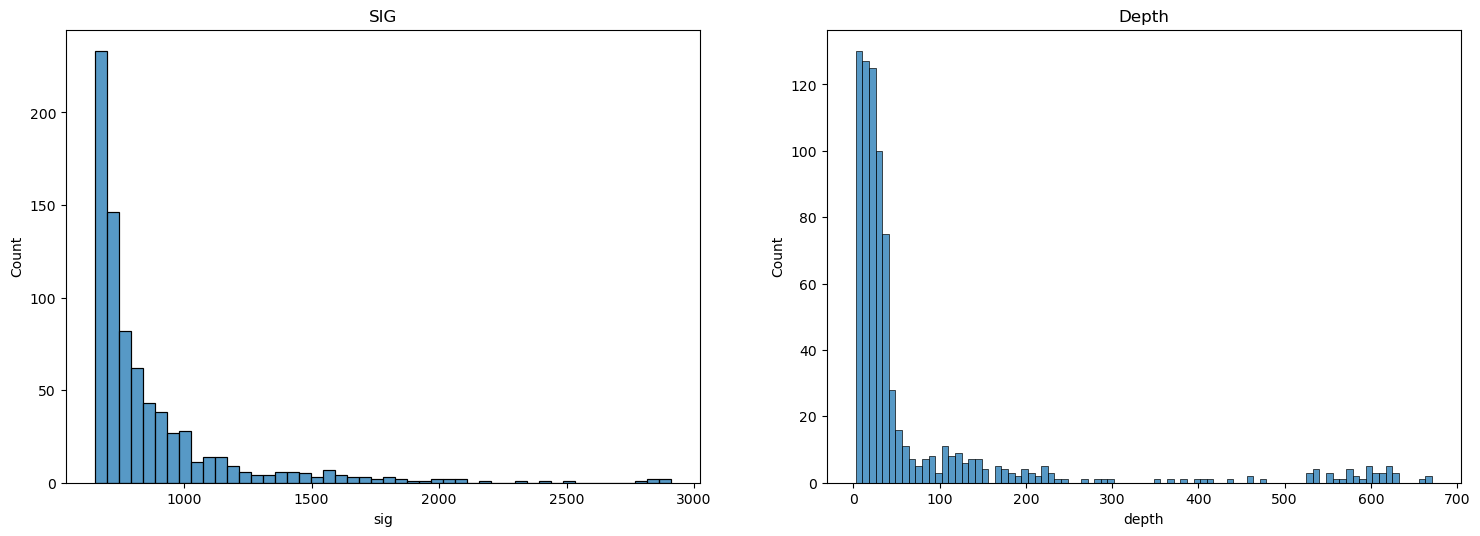

In [435]:
fig, axes =plt.subplots(1, 2, figsize = (18,6), dpi=100)

sns.histplot(data=df, x='sig',ax=axes[0])
axes[0].set_title('SIG')

sns.histplot(data=df, x='depth', ax=axes[1])
axes[1].set_title('Depth')

<AxesSubplot:xlabel='count', ylabel='country'>

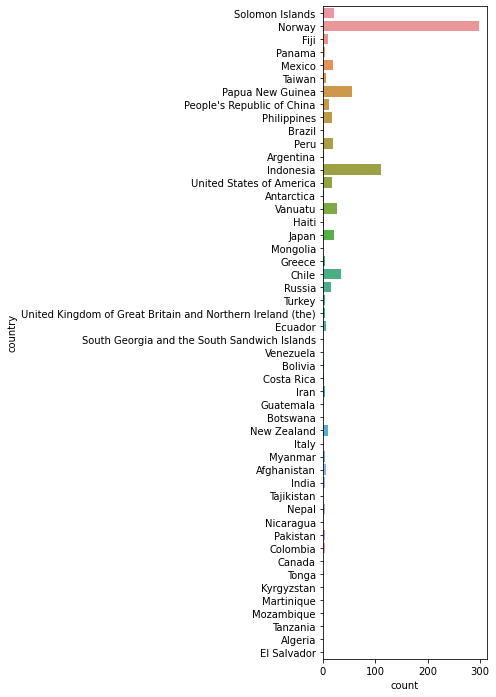

In [436]:
plt.figure(figsize=(10,12))
plt.subplot(1,3,3)
sns.countplot(data = df, y = 'country')

<AxesSubplot:xlabel='continent', ylabel='count'>

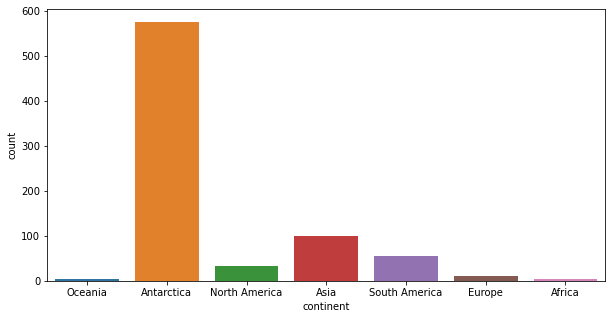

In [437]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'continent')

<AxesSubplot:xlabel='tsunami', ylabel='count'>

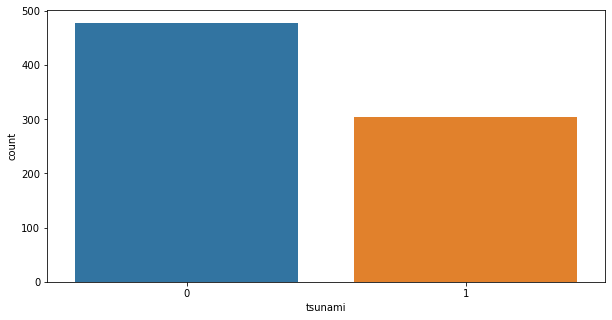

In [438]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'tsunami')

<AxesSubplot:xlabel='count', ylabel='magnitude'>

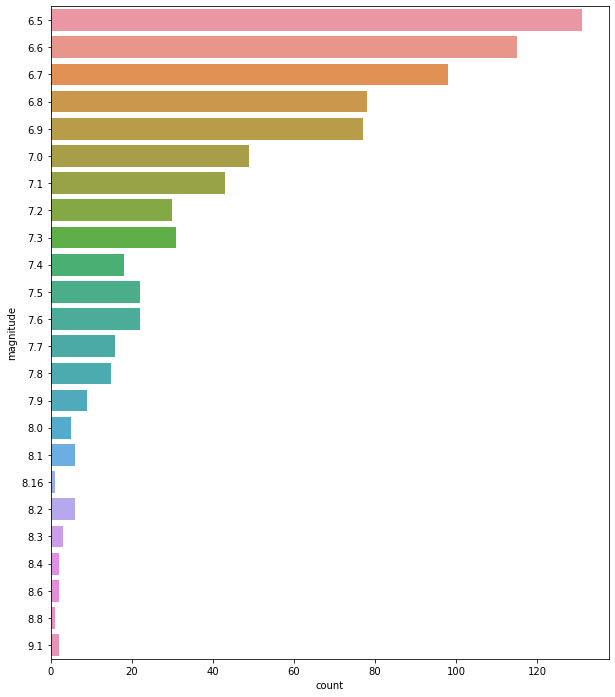

In [439]:
plt.figure(figsize=(10,12))
sns.countplot(data = df, y = 'magnitude')

<AxesSubplot:xlabel='alert', ylabel='count'>

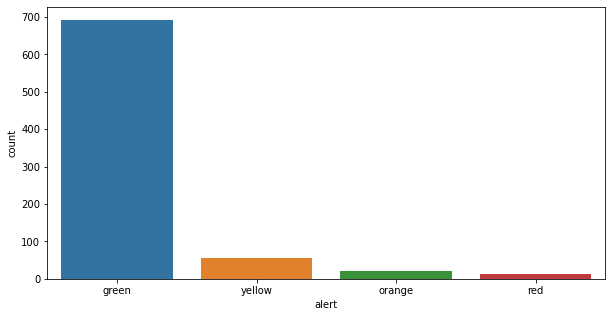

In [440]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'alert')

# Bivariate Data Analysis

<AxesSubplot:xlabel='tsunami', ylabel='country'>

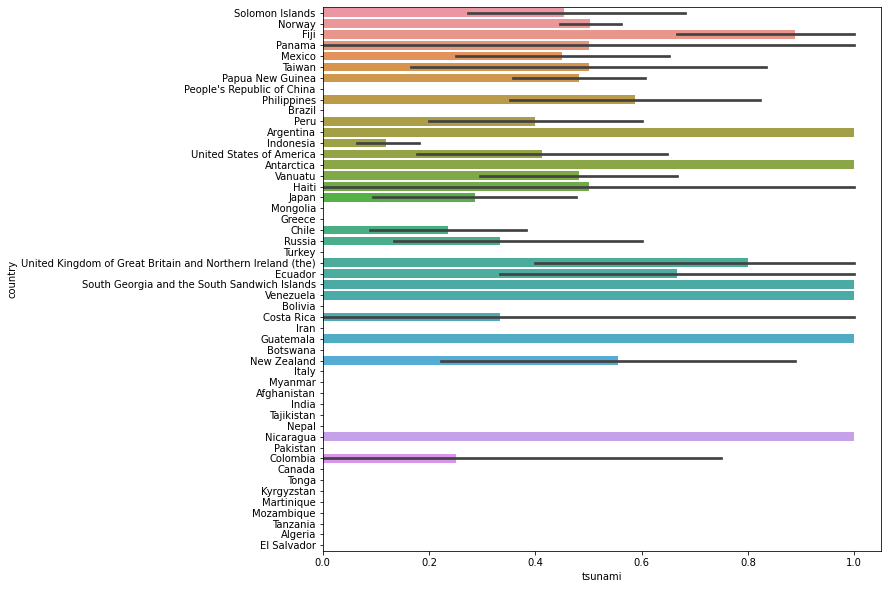

In [441]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='tsunami', y='country')

<AxesSubplot:xlabel='magnitude', ylabel='country'>

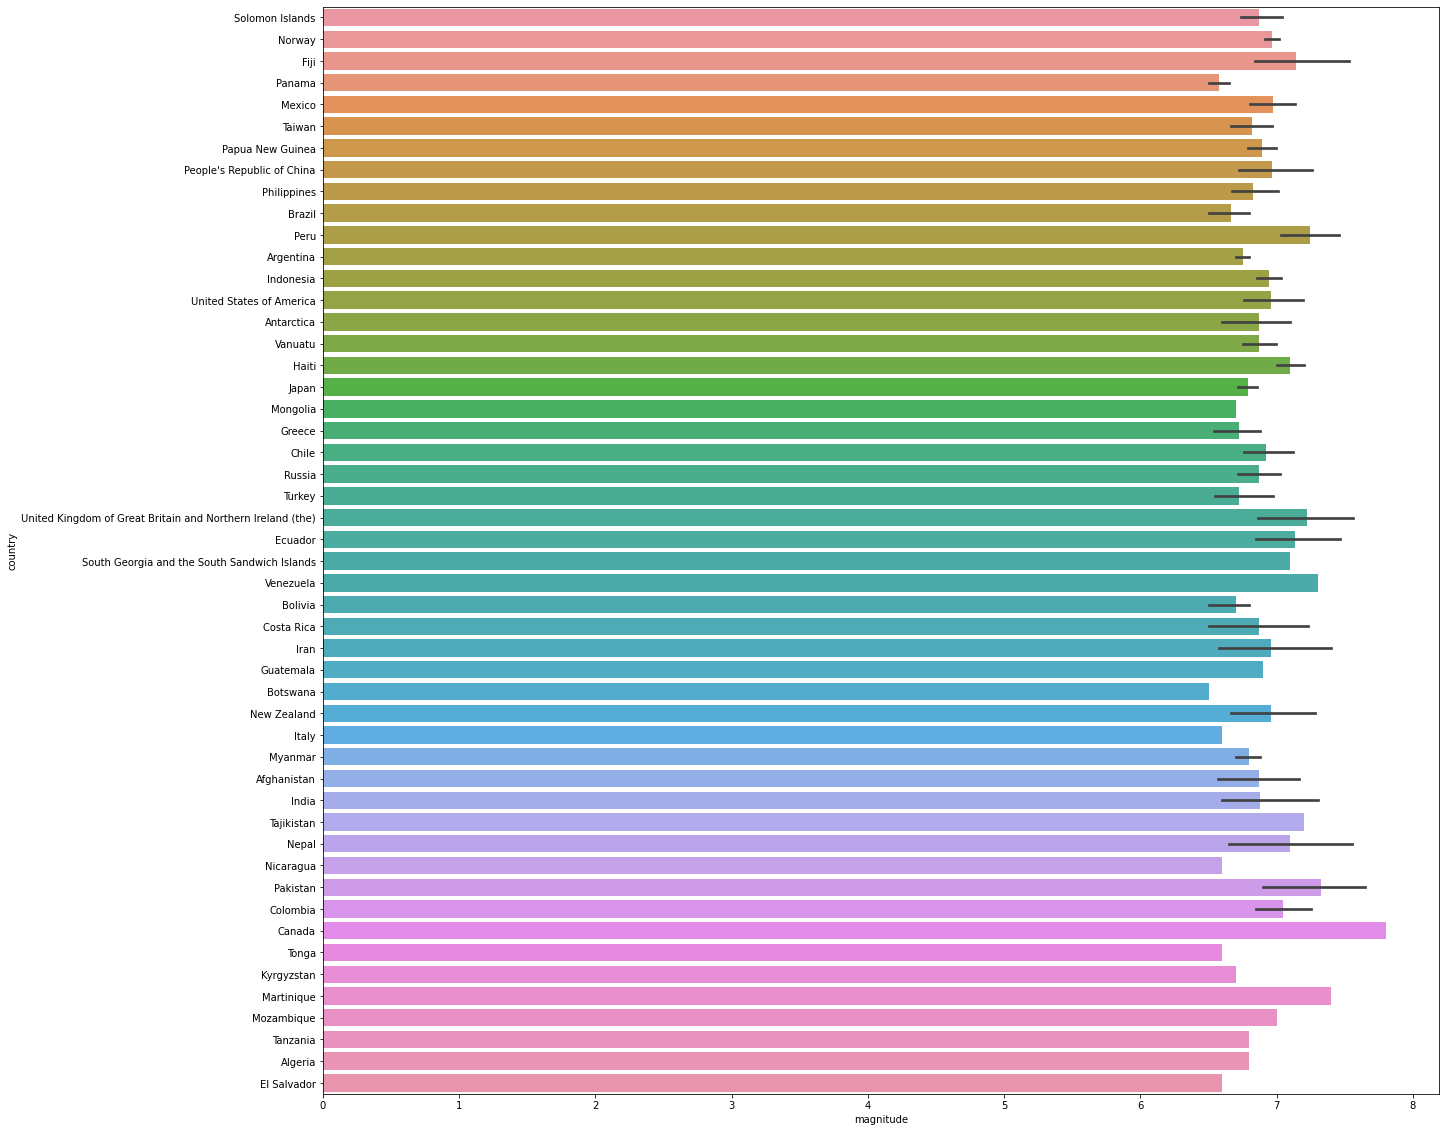

In [442]:
plt.figure(figsize=(20,20))
sns.barplot(data=df, x='magnitude', y='country')

<AxesSubplot:xlabel='magnitude', ylabel='continent'>

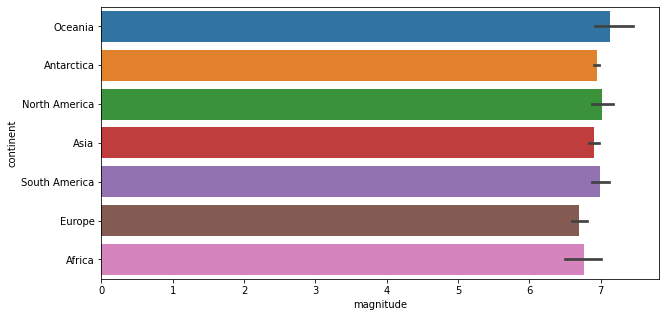

In [443]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='magnitude', y='continent')

<AxesSubplot:xlabel='sig', ylabel='country'>

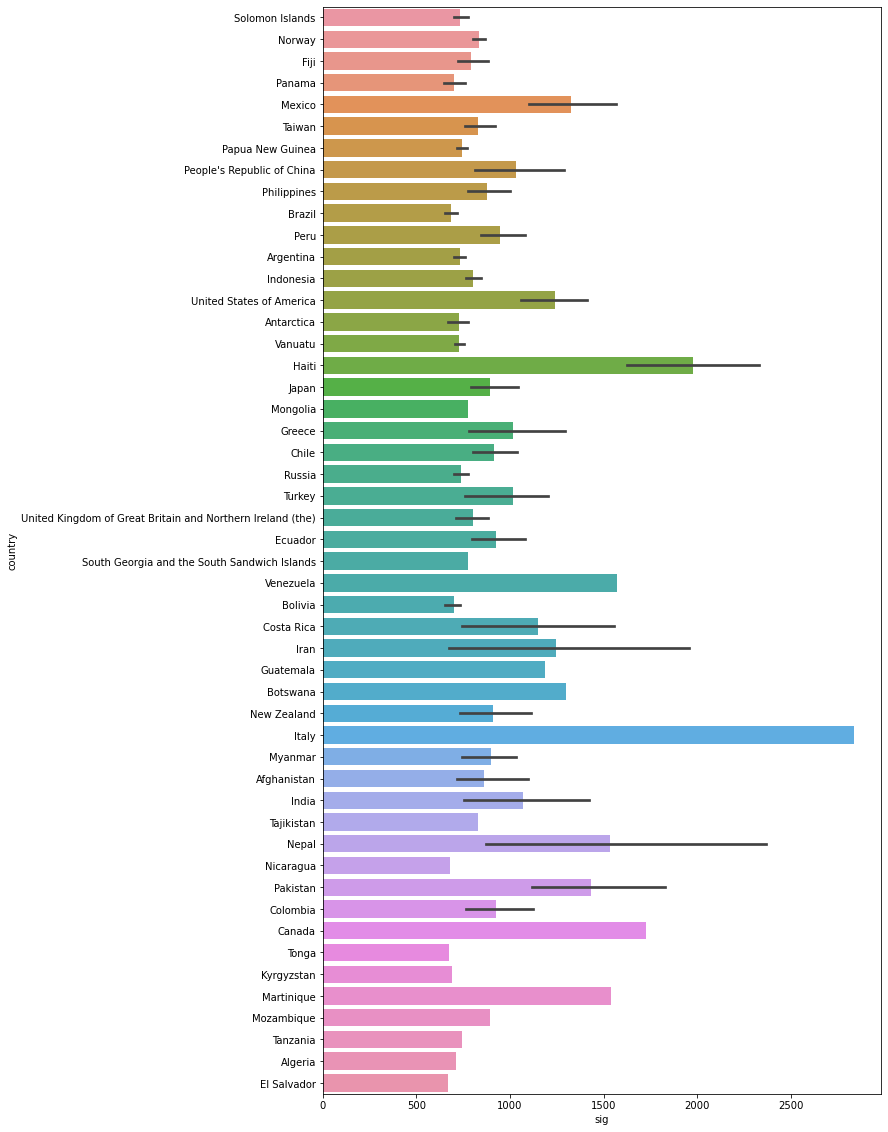

In [444]:
plt.figure(figsize=(10,20))
sns.barplot(data=df, x='sig', y='country')

<AxesSubplot:xlabel='continent', ylabel='sig'>

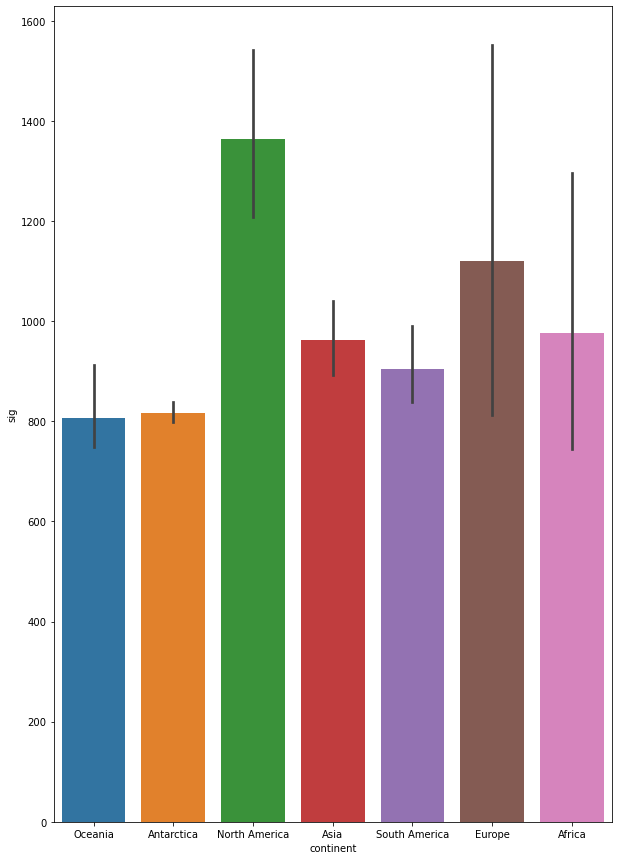

In [445]:
plt.figure(figsize=(10,15))
sns.barplot(data=df, y='sig', x='continent')

<AxesSubplot:xlabel='depth', ylabel='country'>

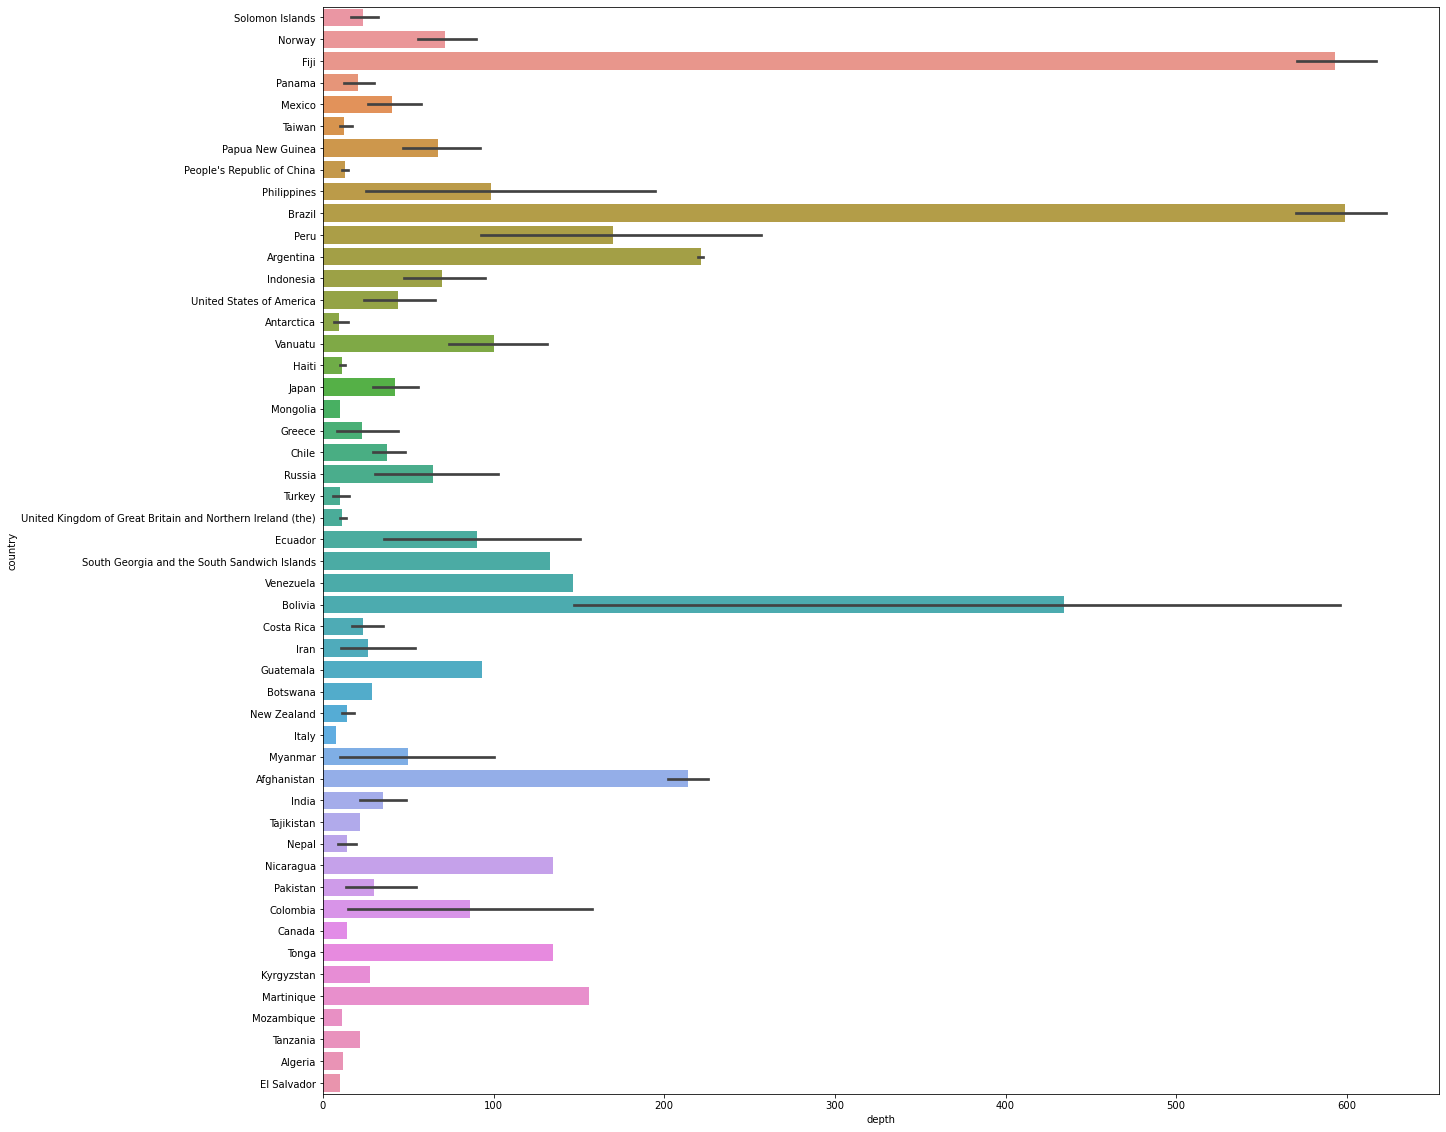

In [446]:
plt.figure(figsize=(20,20))
sns.barplot(data=df, x='depth', y='country')

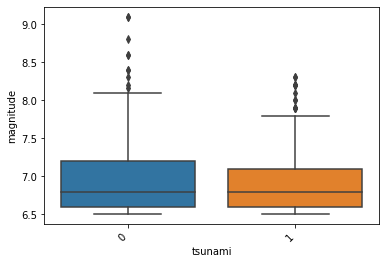

In [447]:
sns.boxplot(data=df, x='tsunami', y='magnitude')
plt.xticks(rotation=45, ha='right');

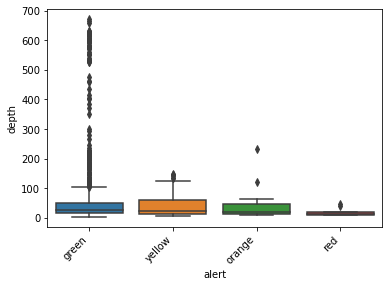

In [448]:
sns.boxplot(data=df, x='alert', y='depth')
plt.xticks(rotation=45, ha='right');

# Multi-Variate Data Analysis

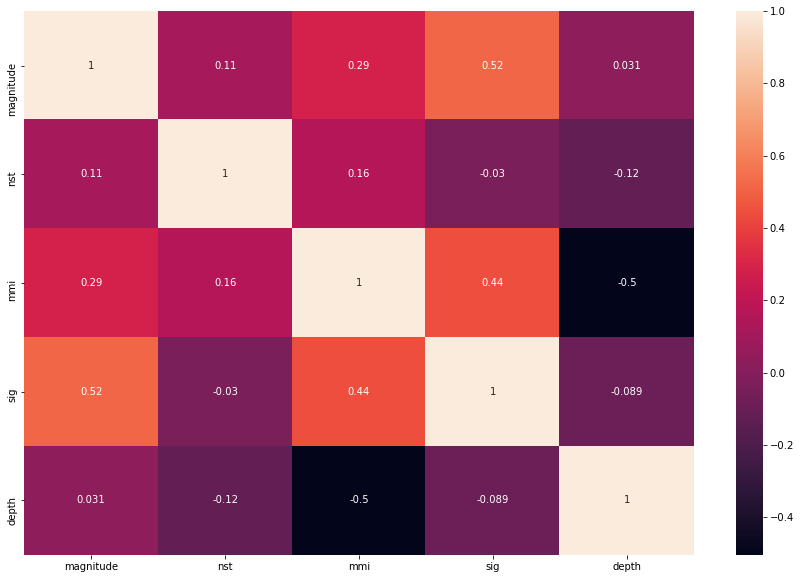

In [449]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df[['magnitude', 'nst', 'mmi', 'sig', 'depth']].corr(), annot=True)
plt.show()

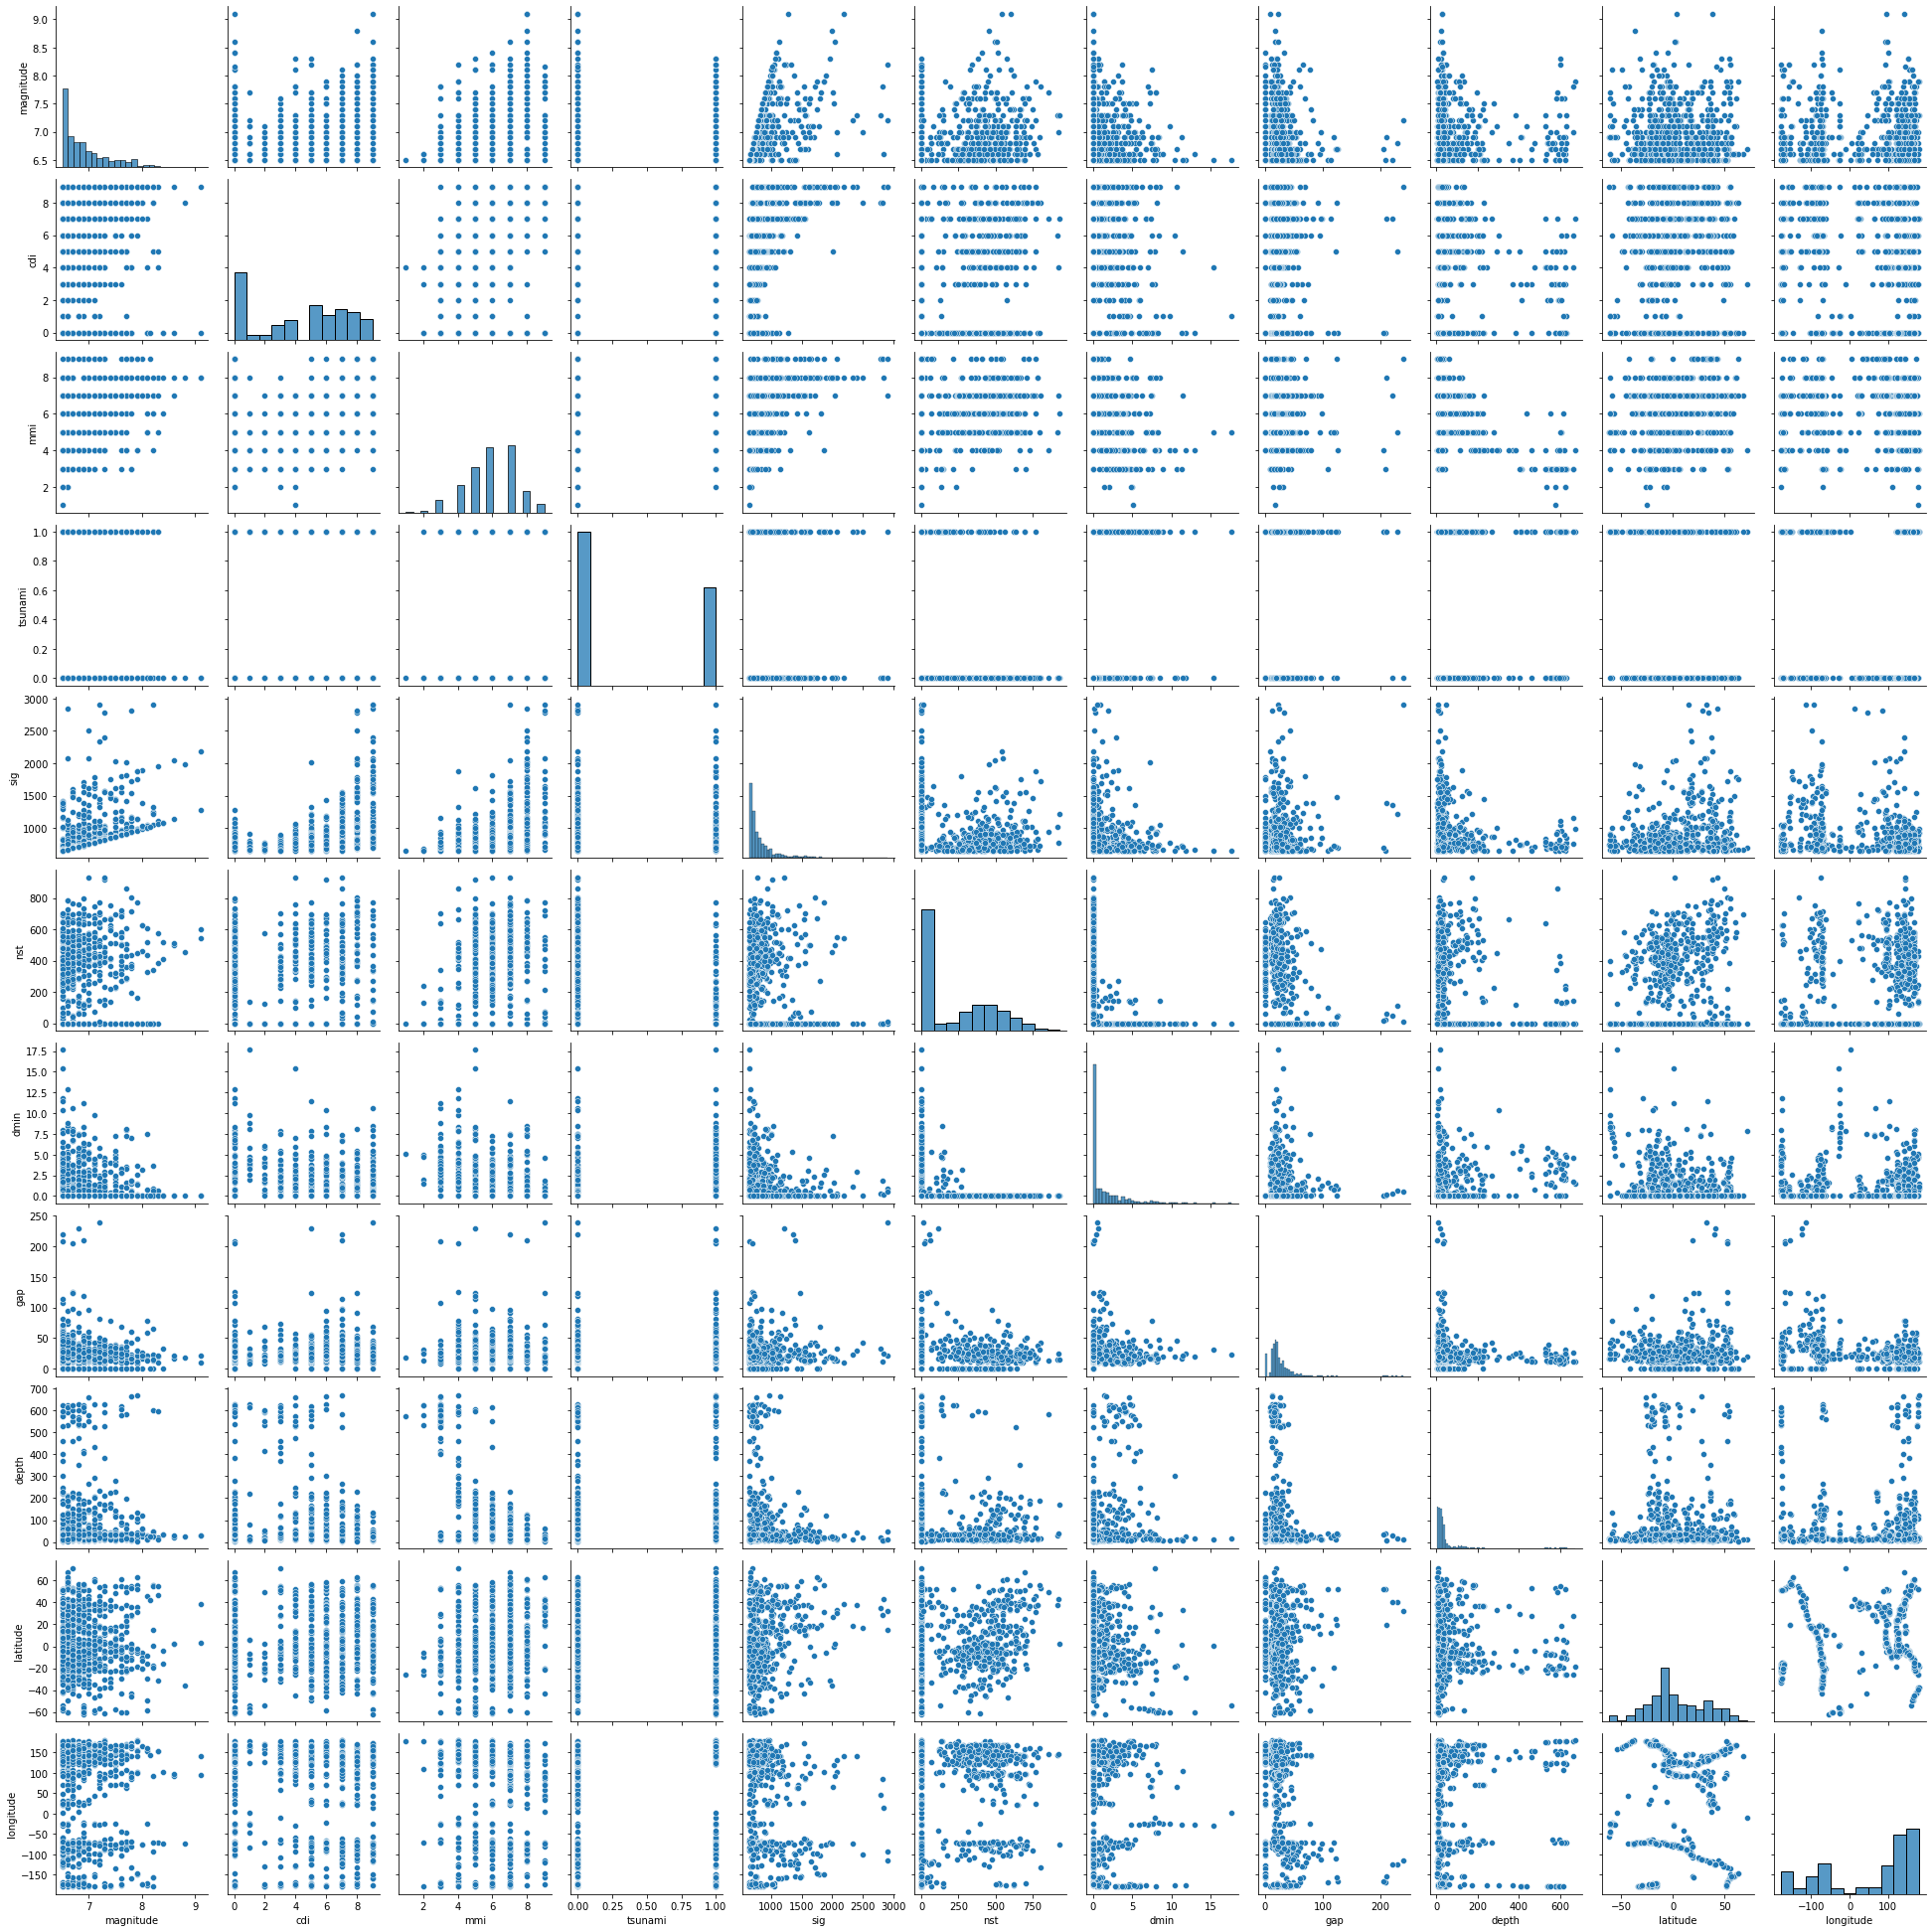

In [450]:
sns.pairplot(df)

# Preparing Data for Modelling


In [452]:
# a copy of the dataset
copy=df.copy()
copy

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",Antarctica,Norway
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,the Fiji Islands,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",Antarctica,Norway
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,the Fiji Islands,Antarctica,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,green,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Antarctica,Norway
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,green,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,Norway
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,green,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",Antarctica,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,green,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",Antarctica,Norway


In [609]:
copy['date_time']=pd.to_datetime(copy['date_time'])
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      782 non-null    object        
 1   magnitude  782 non-null    float64       
 2   date_time  782 non-null    datetime64[ns]
 3   cdi        782 non-null    int64         
 4   mmi        782 non-null    int64         
 5   alert      782 non-null    int64         
 6   tsunami    782 non-null    int64         
 7   sig        782 non-null    int64         
 8   net        782 non-null    object        
 9   nst        782 non-null    int64         
 10  dmin       782 non-null    float64       
 11  gap        782 non-null    float64       
 12  magType    782 non-null    int64         
 13  depth      782 non-null    float64       
 14  latitude   782 non-null    float64       
 15  longitude  782 non-null    float64       
 16  location   782 non-null    object        
 1

In [610]:
copy['date_time']=pd.DatetimeIndex(copy['date_time']).month

# Label Encoding

In [611]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
copy['alert']=le.fit_transform(copy['alert'])
copy['magType']=le.fit_transform(copy['magType'])
copy['nat']=le.fit_transform(copy['net'])
copy['tsunami']=le.fit_transform(copy['tsunami'])
copy

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,nat
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,1,8,7,0,1,768,us,117,0.509,17.0,8,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,9
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,1,4,4,0,0,735,us,99,2.229,34.0,8,25.000,-4.9559,100.738,"Bengkulu, Indonesia",Antarctica,Norway,9
2,M 7.0 -,7.0,1,3,3,0,1,755,us,147,3.125,18.0,8,579.000,-20.0508,-178.346,the Fiji Islands,Oceania,Fiji,9
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,1,5,5,0,1,833,us,149,1.865,21.0,8,37.000,-19.2918,-172.129,"Neiafu, Tonga",Antarctica,Norway,9
4,M 6.6 -,6.6,1,0,2,0,1,670,us,131,4.998,27.0,8,624.464,-25.5948,178.278,the Fiji Islands,Antarctica,Norway,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,1,0,8,0,0,912,us,427,0.000,0.0,7,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Antarctica,Norway,9
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,1,5,7,0,0,745,ak,0,0.000,0.0,5,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,Norway,0
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,1,0,7,0,0,776,us,372,0.000,0.0,6,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",Antarctica,Vanuatu,9
780,"M 6.8 - Mindanao, Philippines",6.8,1,0,5,0,0,711,us,64,0.000,0.0,7,33.000,6.6310,126.899,"Mindanao, Philippines",Antarctica,Norway,9


In [612]:
copy.corr()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,nat
magnitude,1.000000,NaN,0.209549,0.285552,0.113205,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.050542,0.030644,-0.008552,-0.013911,-0.105943
date_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cdi,0.209549,NaN,1.000000,0.317937,0.365732,0.160266,0.479788,-0.175417,0.006554,0.098143,0.243428,-0.097891,0.129003,-0.149048,-0.073884
mmi,0.285552,NaN,0.317937,1.000000,0.318581,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.061865,-0.504439,0.144883,-0.005803,-0.108195
alert,0.113205,NaN,0.365732,0.318581,1.000000,0.196484,0.389142,-0.228859,0.080638,0.093035,0.143745,-0.085317,0.122920,-0.063778,-0.048807
tsunami,-0.004726,NaN,0.160266,-0.147363,0.196484,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.340445,0.056814,-0.113209,-0.136778,-0.015190
sig,0.515871,NaN,0.479788,0.442423,0.389142,-0.015500,1.000000,-0.030100,-0.095318,0.114285,0.012673,-0.088667,0.204306,-0.190132,-0.199378
nst,0.113114,NaN,-0.175417,0.160417,-0.228859,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.327961,-0.121982,0.144204,0.173665,0.130493
dmin,-0.091403,NaN,0.006554,-0.299074,0.080638,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.318009,0.168546,-0.238377,-0.097875,0.097827
gap,-0.110626,NaN,0.098143,-0.015723,0.093035,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.291859,-0.111912,0.087756,-0.313623,-0.148506


# Slicing Dataset

In [613]:
x = copy.drop(['title', 'location', 'country', 'continent', 'tsunami', 'net'], axis=1)
y = copy['tsunami']

In [614]:
copy['tsunami'].value_counts()

0    478
1    304
Name: tsunami, dtype: int64

# Feature Scaling

In [615]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.13223459,  0.        ,  1.15730518, ..., -0.48869077,
         0.90802616,  0.18593205],
       [-0.0923689 ,  0.        , -0.10535635, ..., -0.31129555,
         0.40848226,  0.18593205],
       [ 0.13223459,  0.        , -0.42102173, ..., -0.86450668,
        -1.96017977,  0.18593205],
       ...,
       [ 0.35683808,  0.        , -1.36801788, ..., -0.67676181,
         0.97230876,  0.18593205],
       [-0.31697239,  0.        , -1.36801788, ...,  0.11335131,
         0.6305178 ,  0.18593205],
       [ 1.25525204,  0.        , -1.36801788, ...,  0.12313656,
         0.62780187,  0.18593205]])

In [616]:
# splitting data in training set and testing set

In [617]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=11, test_size=0.2)

# Building Model

# Logistic Regression

In [618]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [619]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

# Evaluation Model Performance


In [535]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

80.2547770700637

In [536]:
lr.score(x_test, y_test)

0.802547770700637

In [576]:
score = r2_score(y_pred, y_test)*100
score

18.964368964368983

In [574]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error( y_test,y_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.19745222929936307
0.19745222929936307
0.44435597137808674


In [538]:
lr.predict_proba(x_test)

array([[0.97240536, 0.02759464],
       [0.92854462, 0.07145538],
       [0.58855962, 0.41144038],
       [0.36337288, 0.63662712],
       [0.30873518, 0.69126482],
       [0.18823419, 0.81176581],
       [0.95403561, 0.04596439],
       [0.97315605, 0.02684395],
       [0.99187742, 0.00812258],
       [0.62188621, 0.37811379],
       [0.93575294, 0.06424706],
       [0.93560991, 0.06439009],
       [0.86445956, 0.13554044],
       [0.18154501, 0.81845499],
       [0.9733797 , 0.0266203 ],
       [0.34649222, 0.65350778],
       [0.99407408, 0.00592592],
       [0.99060894, 0.00939106],
       [0.91092545, 0.08907455],
       [0.95132654, 0.04867346],
       [0.53149267, 0.46850733],
       [0.1398545 , 0.8601455 ],
       [0.99256593, 0.00743407],
       [0.98716994, 0.01283006],
       [0.36391943, 0.63608057],
       [0.2831704 , 0.7168296 ],
       [0.98772951, 0.01227049],
       [0.28562375, 0.71437625],
       [0.92493314, 0.07506686],
       [0.27208938, 0.72791062],
       [0.

In [539]:
from sklearn.metrics import max_error, mean_absolute_error, r2_score, mean_squared_error

# Naive_bayes

In [540]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [541]:
predictions=nb.predict(x_test)
predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

# Evaluation Model Performance


In [542]:
from sklearn.metrics import accuracy_score
ac2=accuracy_score(y_test,y_pred)*100
ac2

80.2547770700637

In [577]:
r2_score(y_test,predictions)*100

18.540297474922195

In [575]:
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error( y_test,predictions)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.1910828025477707
0.1910828025477707
0.43713018947193605


<AxesSubplot:xlabel='tsunami', ylabel='Density'>

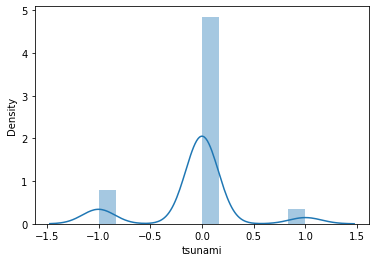

In [571]:
sns.distplot(y_test-predictions)

# Linear Regression

In [544]:
from sklearn.linear_model import LinearRegression

In [545]:
model = LinearRegression()

In [546]:
model.fit(x_train,y_train)

LinearRegression()

In [547]:
print(model.intercept_)
print(model.score(x_train,y_train))

0.38740478874024276
0.43388383515434936


In [548]:
model.coef_

array([ 0.07537312, -0.00058581,  0.03096951, -0.0615726 ,  0.03847686,
       -0.08235085, -0.23104213,  0.04501685,  0.03964926,  0.07884568,
       -0.04901108,  0.01298267, -0.0346811 , -0.00909733])

In [549]:
pred =model.predict(x_test)
pred

array([ 0.02171414,  0.13061016,  0.43950929,  0.60837848,  0.65111693,
        0.77648449,  0.12371353,  0.03276421, -0.14920335,  0.39890863,
        0.1571694 ,  0.08943814,  0.26105327,  0.76158631,  0.01569941,
        0.6017137 , -0.17364583, -0.13134369,  0.21802009,  0.10522784,
        0.48542671,  0.84467883, -0.14449309, -0.07397669,  0.63813691,
        0.68830364, -0.05711017,  0.78434906,  0.15465051,  0.76370746,
       -0.00508595, -0.02612291,  0.77965712,  0.39955523,  0.27617003,
       -0.27197039,  0.24583679,  0.0606763 ,  0.04551144,  0.23411471,
       -0.0149236 ,  0.78787792,  0.68597366,  0.72855498,  0.2138674 ,
        0.09137236,  0.37101836,  0.70780164,  0.20262268,  0.63706604,
        0.6089086 ,  0.05718653,  0.21671742,  0.7309482 ,  0.14462535,
        0.73737977,  0.71506364,  0.69690875,  0.04046859,  0.74000525,
        0.14146288,  0.71372278,  0.16620232,  0.79069024,  0.8740409 ,
        0.97811499,  0.14653729,  0.6635436 ,  0.67972686,  0.70

# Evaluation Model Performance


In [578]:
r2_score(y_test,pred)*100

32.11691456243516

In [551]:
import numpy as np
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error( y_test,pred)
rmse = np.sqrt(mse)

In [552]:
print(mae)
print(mse)
print(rmse)

0.29971470156974456
0.14744818873436766
0.38398982894650696


<AxesSubplot:xlabel='tsunami', ylabel='Density'>

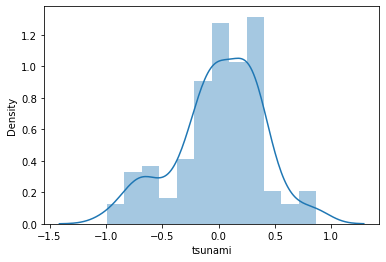

In [553]:
# A histogram of the residuals. the residuals look to be normally distributed
# import warnings
# warnings.filterwarning('ignore')
sns.distplot(y_test-pred)

# Random Forest

In [557]:
from sklearn.ensemble import RandomForestClassifier

In [561]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [562]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=11, max_leaf_nodes=6)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=6, random_state=11)

In [568]:
predict = model.predict(X_test)
predict

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

In [593]:
# let's do hyperparameter turning for Random Forest GridSearchCV and fit the data
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [594]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [595]:
from sklearn.model_selection import GridSearchCV

In [596]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv =4, n_jobs=-1, verbose=1, scoring='accuracy')

In [604]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 1min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [606]:
grid_search.best_score_

0.8816144047035767

In [607]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

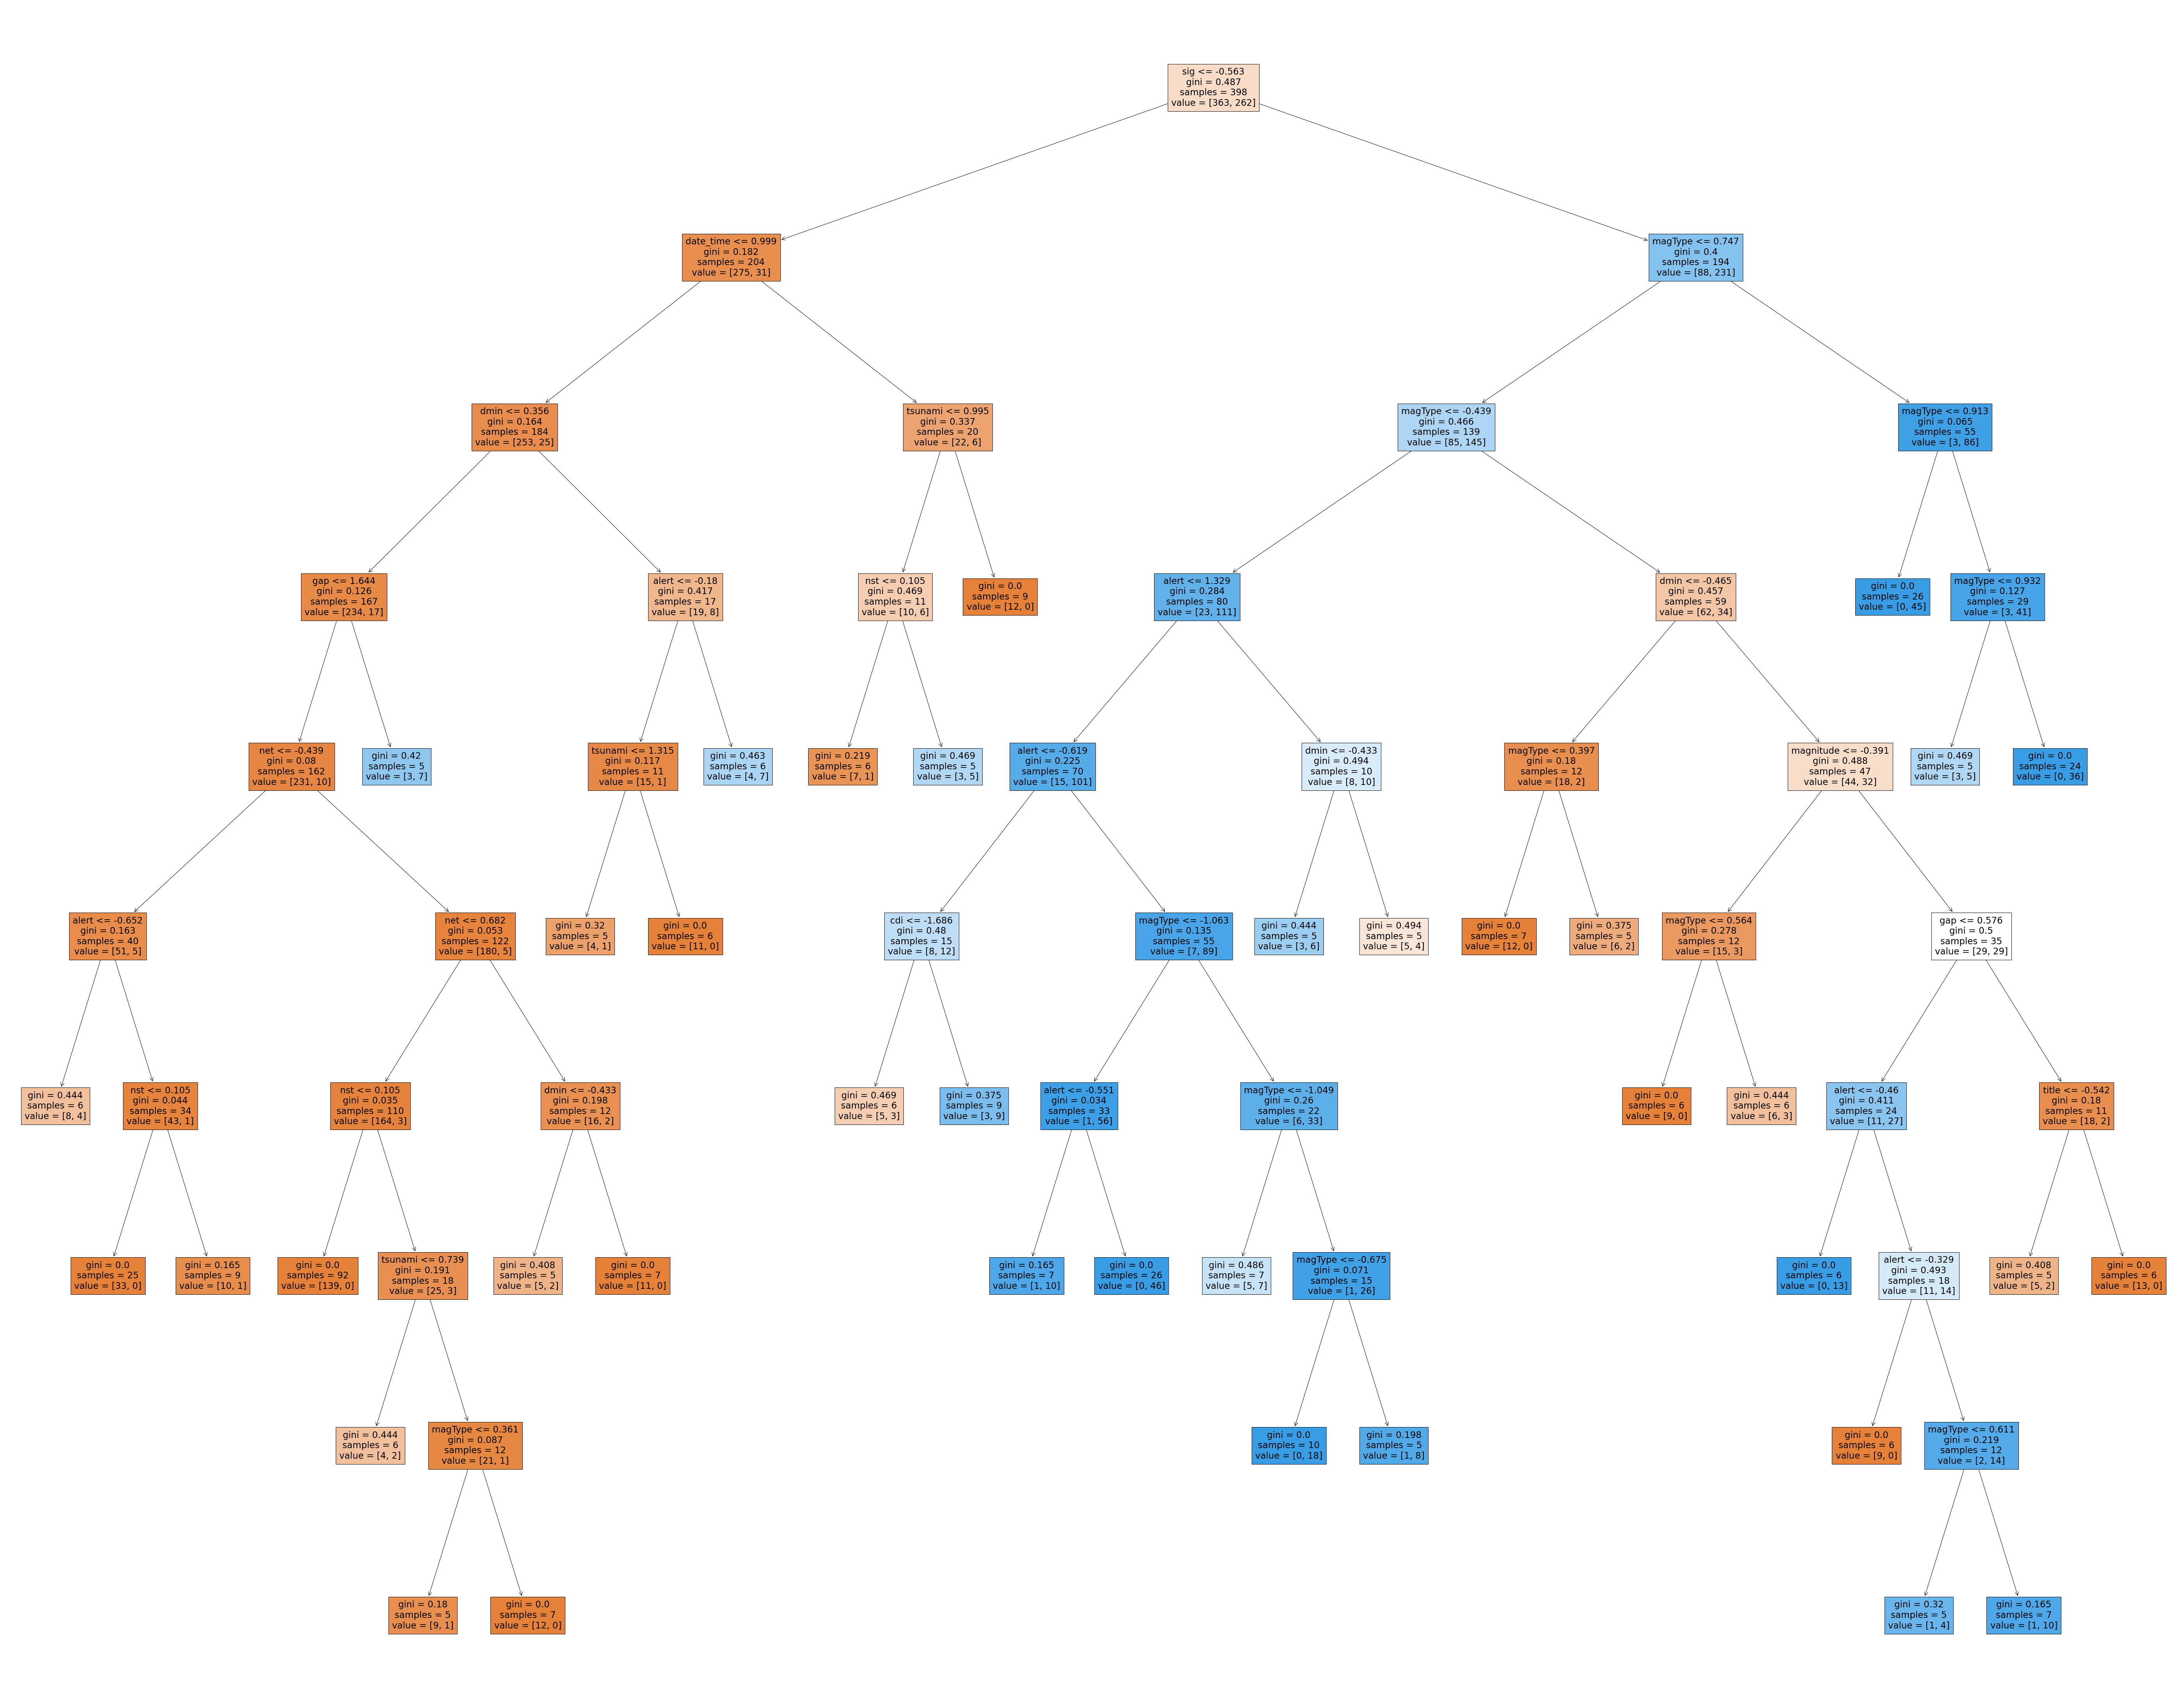

In [608]:
# Now, let's visualize
from sklearn.tree import plot_tree
plt.figure(figsize=(100,80))
plot_tree(rf_best.estimators_[5], feature_names = df.columns,  filled=True);

# Evaluation Model Performance

In [569]:
r2_score(y_test,predict)

0.3211691456243516

In [573]:
print(accuracy_score(y_true=y_test, y_pred=predict))

0.8407643312101911


In [572]:
mae = mean_absolute_error(y_test,predict)
mse = mean_squared_error( y_test,predict)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.1592356687898089
0.1592356687898089
0.39904344223381105


<AxesSubplot:xlabel='tsunami', ylabel='Density'>

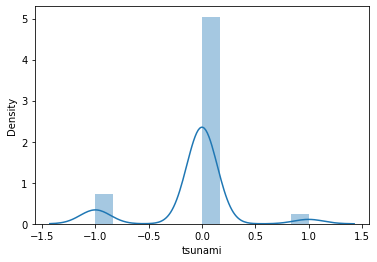

In [570]:
sns.distplot(y_test-predict)

# XGBoost

In [590]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train,y_train)
pre = XGB.predict(x_test)
pre

array([-1.91328283e-02, -1.19226426e-02,  1.81372464e-01,  3.06176156e-01,
        1.07866466e+00,  6.36245430e-01,  3.01444292e-01,  4.96051945e-02,
        1.03662405e-02,  2.20082756e-02, -3.37784644e-03, -6.56892210e-02,
        5.51826041e-03,  1.00387621e+00,  4.81652796e-01,  8.62086177e-01,
        4.78953905e-02, -3.24107707e-03,  1.71510838e-02,  2.49625258e-02,
        8.51995647e-01,  3.19906294e-01,  6.78461650e-03,  1.21846301e-02,
        2.68242322e-02,  9.95021641e-01,  5.67684416e-03,  1.69359878e-01,
        2.07652643e-01,  9.75609660e-01, -4.56860848e-02, -1.44250747e-02,
        1.02252877e+00,  1.01946735e+00,  6.18980765e-01,  2.69679636e-01,
        1.24423215e-02,  7.57561577e-03,  2.29744352e-02,  1.49763888e-02,
       -2.32829452e-02,  1.04024994e+00,  3.74669135e-01,  1.04326749e+00,
        1.62200648e-02, -8.41968320e-03,  5.61295003e-02,  9.77264583e-01,
       -2.68468130e-02,  8.88669908e-01,  7.11816490e-01, -7.62575585e-03,
        2.27530804e-02,  

In [585]:
r2_score(y_test,pre)

0.5646972816635538

In [588]:
mae = mean_absolute_error(y_test,pre)
mse = mean_squared_error( y_test,pre)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.1698666646580544
0.10211044332108128
0.31954724740025736
